# Student Performance Analysis

# Problem Statement

**This Project understands how the student's performance is affected by other variables such Gender, Ethinicity, Parentel level of education, Lunch and Test preprations**

# Importing Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd 
%matplotlib inline

In [2]:
pd.options.display.max_columns = None
pd.options.display.precision = 2

# Reading Data

In [3]:
students = pd.read_csv('StudentsPerformance.csv')

In [4]:
students.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


# Data Information

In [5]:
students.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [6]:
students.shape

(1000, 8)

In [7]:
students.dtypes

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

In [8]:
students.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [9]:
students['gender'].unique()

array(['female', 'male'], dtype=object)

In [10]:
students['race/ethnicity'].unique()

array(['group B', 'group C', 'group A', 'group D', 'group E'],
      dtype=object)

In [11]:
students['parental level of education'].unique()

array(["bachelor's degree", 'some college', "master's degree",
       "associate's degree", 'high school', 'some high school'],
      dtype=object)

In [12]:
students['lunch'].unique()

array(['standard', 'free/reduced'], dtype=object)

In [13]:
students['test preparation course'].unique()

array(['none', 'completed'], dtype=object)

In [14]:
students.describe().rename({'50%': 'median'})

,math score,reading score,writing score
count,1000.00,1000.00,1000.00
mean,66.09,69.17,68.05
std,15.16,14.60,15.20
min,0.00,17.00,10.00
25%,57.00,59.00,57.75
median,66.00,70.00,69.00
75%,77.00,79.00,79.00
max,100.00,100.00,100.00


In [15]:
students[['math score', 'reading score', 'writing score']].skew()

math score      -0.28
reading score   -0.26
writing score   -0.29
dtype: float64

In [16]:
students.duplicated().sum()

0

In [17]:
students.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

* **Data information:**
    * gender: sex of students ['male', 'felale']
    * race/ethinicity: ethinicity of studehts -> [Group A,B,C,D,E]
    * parental level of education : parent's education -> [bachelor's degree,some college,master's degree,associate's degree,high school]
    * lunch : having lunch before test [standard, free/reduced]
    * test preparation course : complete or not complete before test
    * math score : marks scored in maths
    * reading score : marks scored in reading
    * writing score : marks scored in writing
______________________________________________________________________
* No dupicated values in data
* No null values in data
* No skewness in numerical data
* All subjects' scores are close to each other

# Data Visualization

## Univariate Analysis

### Adding column avg score

In [18]:
students['avg_score'] = (students['math score'] + students['reading score'] + students['writing score']) / 3

In [19]:
students.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,avg_score
0,female,group B,bachelor's degree,standard,none,72,72,74,72.67
1,female,group C,some college,standard,completed,69,90,88,82.33
2,female,group B,master's degree,standard,none,90,95,93,92.67
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.33
4,male,group C,some college,standard,none,76,78,75,76.33


In [20]:
students['avg_score'].skew()

-0.29905711750168584

In [21]:
students['avg_score'].describe()

count    1000.00
mean       67.77
std        14.26
min         9.00
25%        58.33
50%        68.33
75%        77.67
max       100.00
Name: avg_score, dtype: float64

In [22]:
gender_count = students['gender'].value_counts()
gender_count

female    518
male      482
Name: gender, dtype: int64

Text(0.5, 1.0, 'Gender Chart')

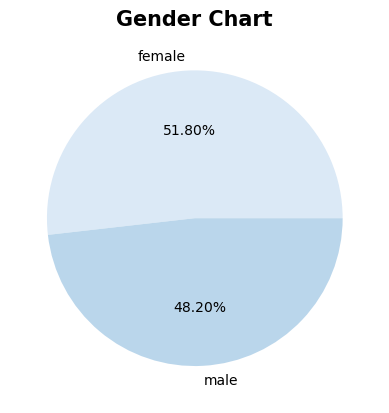

In [23]:
sns.set_palette('Blues')
plt.pie(gender_count.values, labels=gender_count.index, autopct='%0.02f%%')
plt.title('Gender Chart', fontsize=15, fontweight='bold')

In [24]:
ethnicity_count = students['race/ethnicity'].value_counts()
ethnicity_count

group C    319
group D    262
group B    190
group E    140
group A     89
Name: race/ethnicity, dtype: int64

Text(0.5, 1.0, 'Ethnicity Chart')

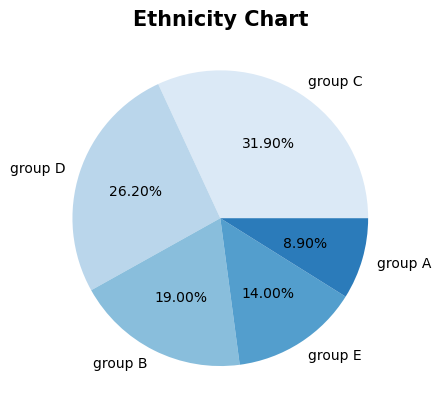

In [25]:
plt.pie(ethnicity_count.values, labels=ethnicity_count.index, autopct='%0.2f%%')
plt.title('Ethnicity Chart', fontsize=15, fontweight='bold')


In [26]:
education_count = students['parental level of education'].value_counts()
education_count

some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parental level of education, dtype: int64

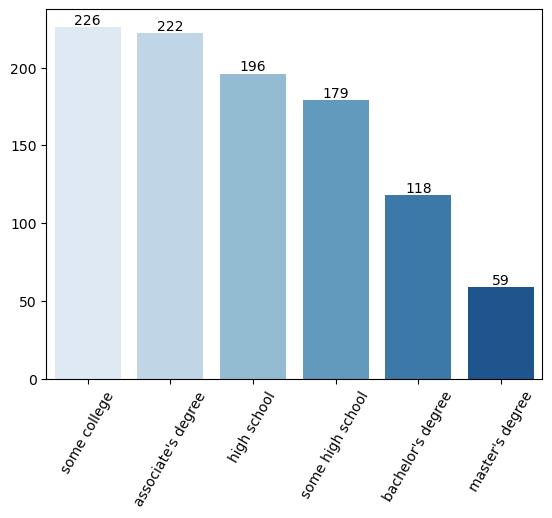

In [27]:
ax = sns.barplot(x=education_count.index, y=education_count.values)
ax.set_xticklabels(ax.get_xticklabels(), rotation=60)
for i, v in enumerate(education_count.values):
    ax.text(i, v, str(v), ha='center', va='bottom')
plt.show()

In [28]:
lunch_count = students['lunch'].value_counts()
lunch_count

standard        645
free/reduced    355
Name: lunch, dtype: int64

Text(0.5, 1.0, 'Lunch Chart')

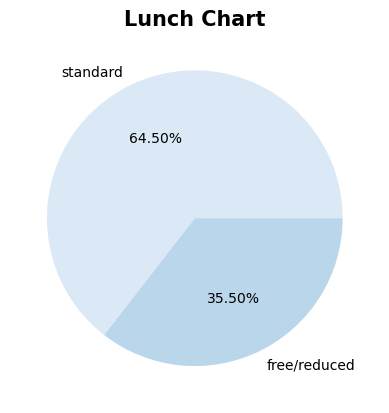

In [29]:
plt.pie(lunch_count.values, labels=lunch_count.index, autopct='%0.2f%%')
plt.title('Lunch Chart', fontsize=15, fontweight='bold')

In [30]:
test_preparation_count = students['test preparation course'].value_counts()
test_preparation_count

none         642
completed    358
Name: test preparation course, dtype: int64

Text(0.5, 1.0, 'Test Preparation Course Chart')

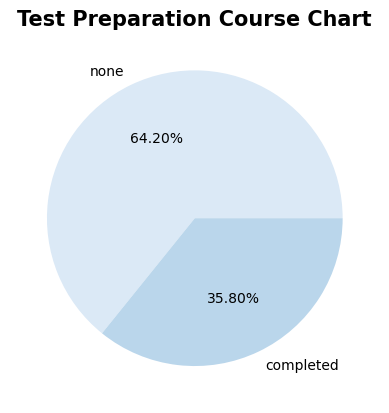

In [31]:
plt.pie(test_preparation_count.values, labels=test_preparation_count.index, autopct='%0.2f%%')
plt.title('Test Preparation Course Chart', fontsize=15, fontweight='bold')

Text(0.5, 1.0, 'Math Score Distribution')

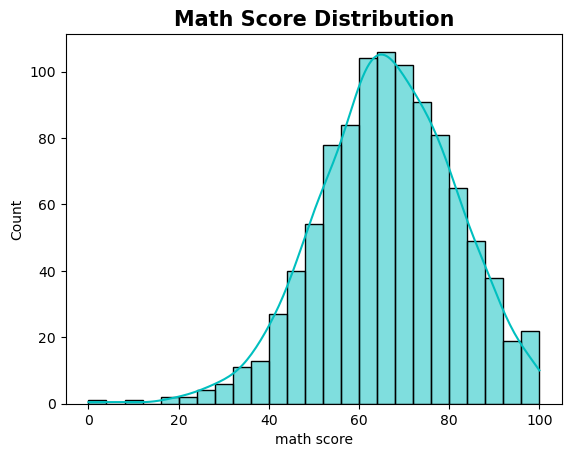

In [32]:
sns.histplot(students['math score'], color='c', kde=True)
plt.title('Math Score Distribution', fontsize=15, fontweight='bold')

Text(0.5, 1.0, 'Reading Score Distribution')

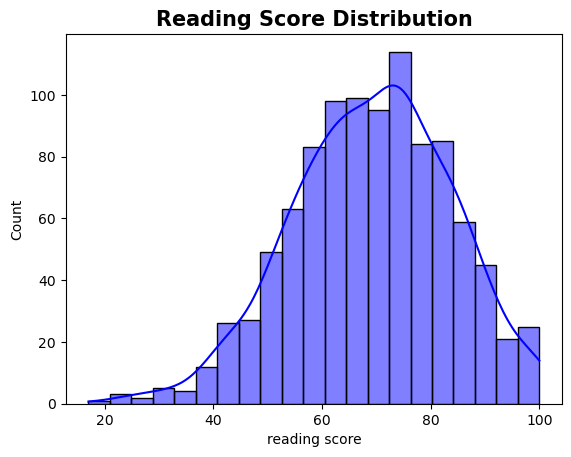

In [33]:
sns.histplot(students['reading score'], color='b', kde=True)
plt.title('Reading Score Distribution', fontsize=15, fontweight='bold')

Text(0.5, 1.0, 'Writing Score Distribution')

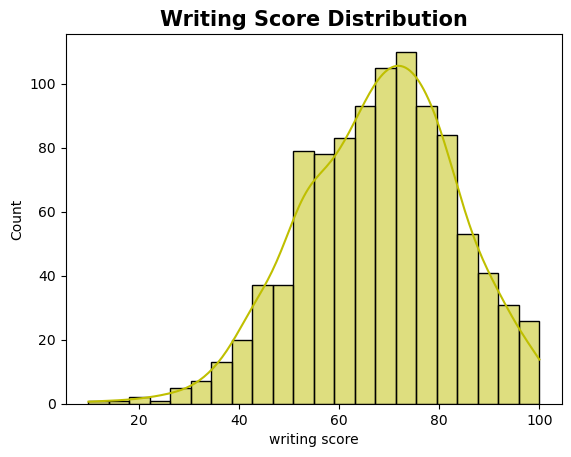

In [34]:
sns.histplot(students['writing score'], color='y', kde=True)
plt.title('Writing Score Distribution', fontsize=15, fontweight='bold')

Text(0.5, 1.0, 'Avg Score Distribution')

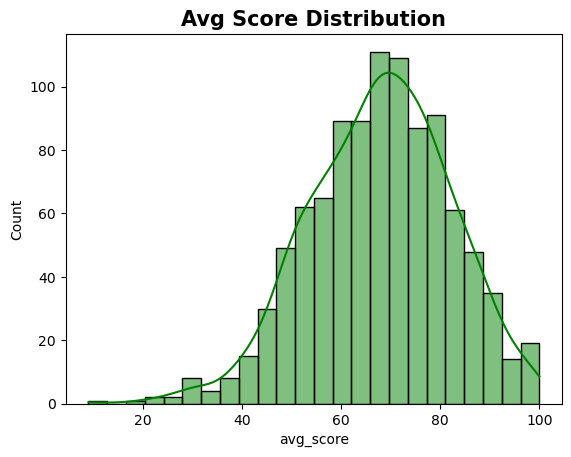

In [35]:
sns.histplot(students['avg_score'], color='g', kde=True)
plt.title('Avg Score Distribution', fontsize=15, fontweight='bold')

<AxesSubplot:title={'center':'Gender relation with average score'}, xlabel='avg_score', ylabel='Count'>

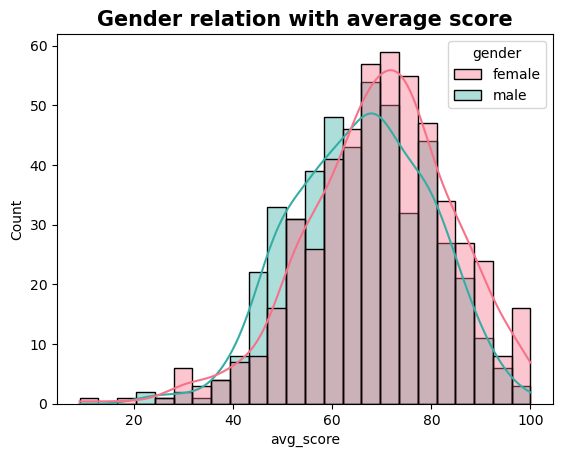

In [36]:
sns.set_palette('husl', 2)
plt.title('Gender relation with average score', fontsize=15, fontweight='bold')
sns.histplot(data=students, x='avg_score', color='g', kde=True, hue='gender', alpha=0.4)

**Females tend to perform well than males**

<AxesSubplot:>

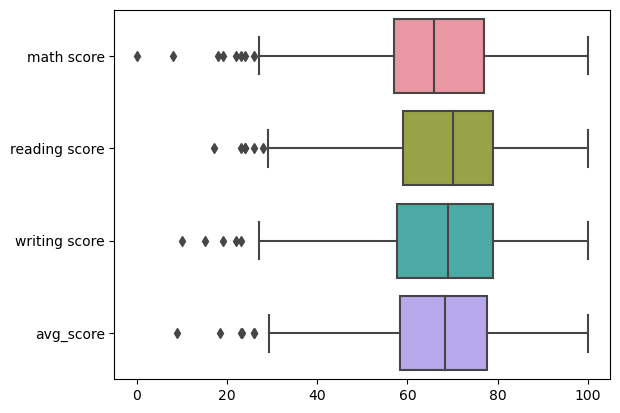

In [37]:
sns.boxplot(data=students, orient='h')

**There are several students have bad grades in exams**

## Multivariate Analysis

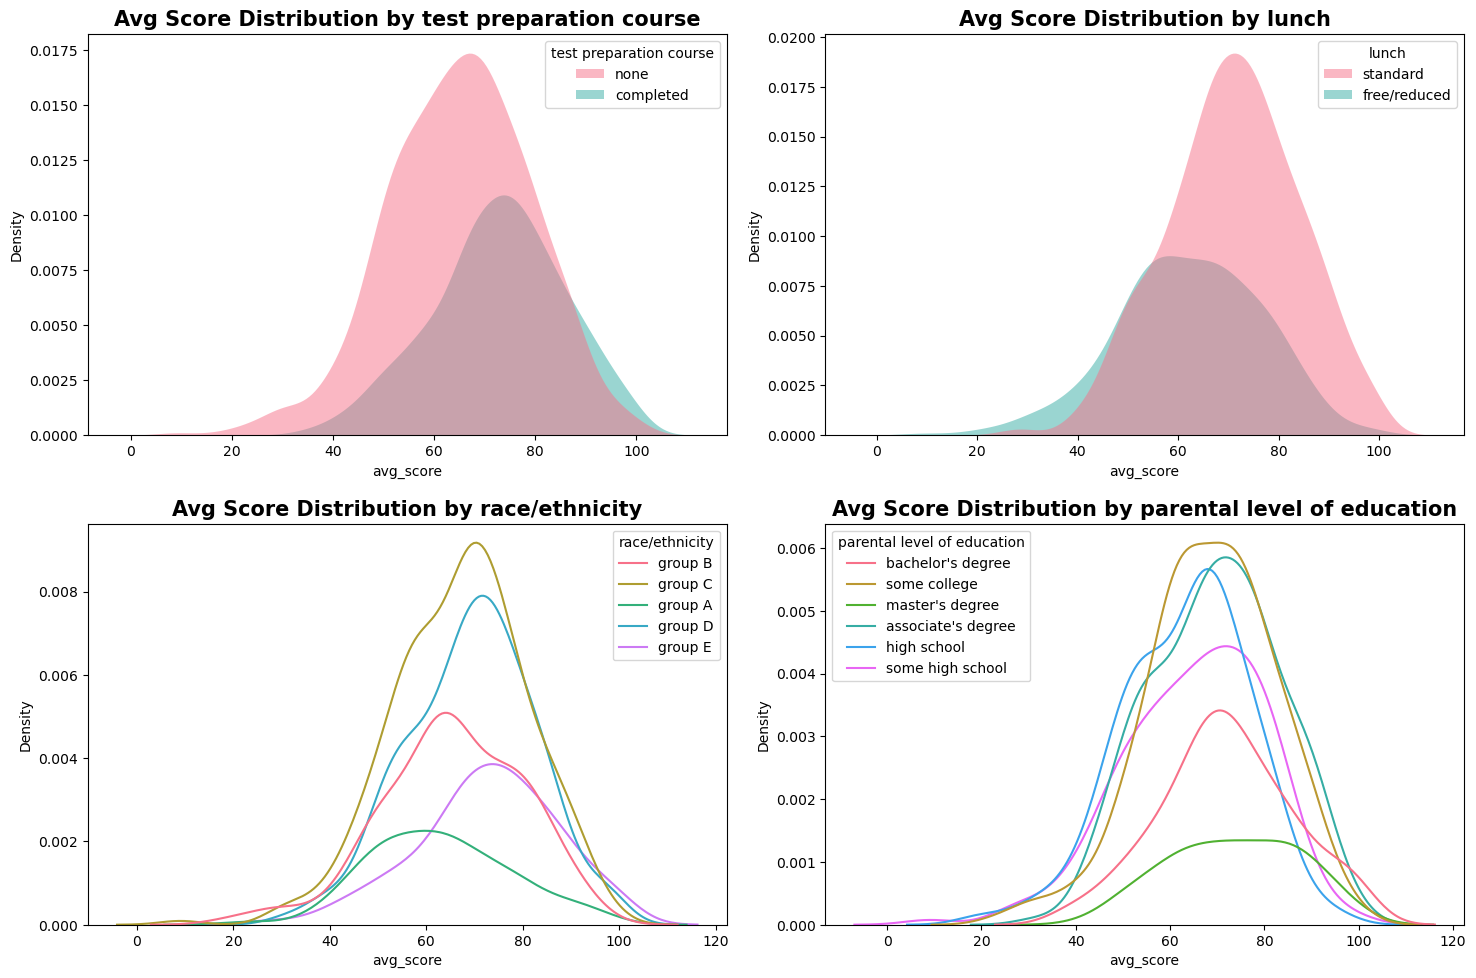

In [38]:
plt.subplots(2, 2, figsize=(15, 10))
sns.color_palette('flare', as_cmap=True)

plt.subplot(2, 2, 1)
sns.kdeplot(data=students, x='avg_score', hue='test preparation course', fill=True, alpha=0.5, linewidth=0, common_norm=True)
plt.title('Avg Score Distribution by test preparation course', fontsize=15, fontweight='bold')

plt.subplot(2, 2, 2)
sns.kdeplot(data=students, x='avg_score', hue='lunch', fill=True, alpha=0.5, linewidth=0, common_norm=True)
plt.title('Avg Score Distribution by lunch', fontsize=15, fontweight='bold')

plt.subplot(2, 2, 3)
sns.kdeplot(data=students, x='avg_score', hue='race/ethnicity', fill=False, common_norm=True)
plt.title('Avg Score Distribution by race/ethnicity', fontsize=15, fontweight='bold')

plt.subplot(2, 2, 4)
sns.kdeplot(data=students, x='avg_score', hue='parental level of education', fill=False, common_norm=True)
plt.title('Avg Score Distribution by parental level of education', fontsize=15, fontweight='bold')

plt.tight_layout(pad=1.5)

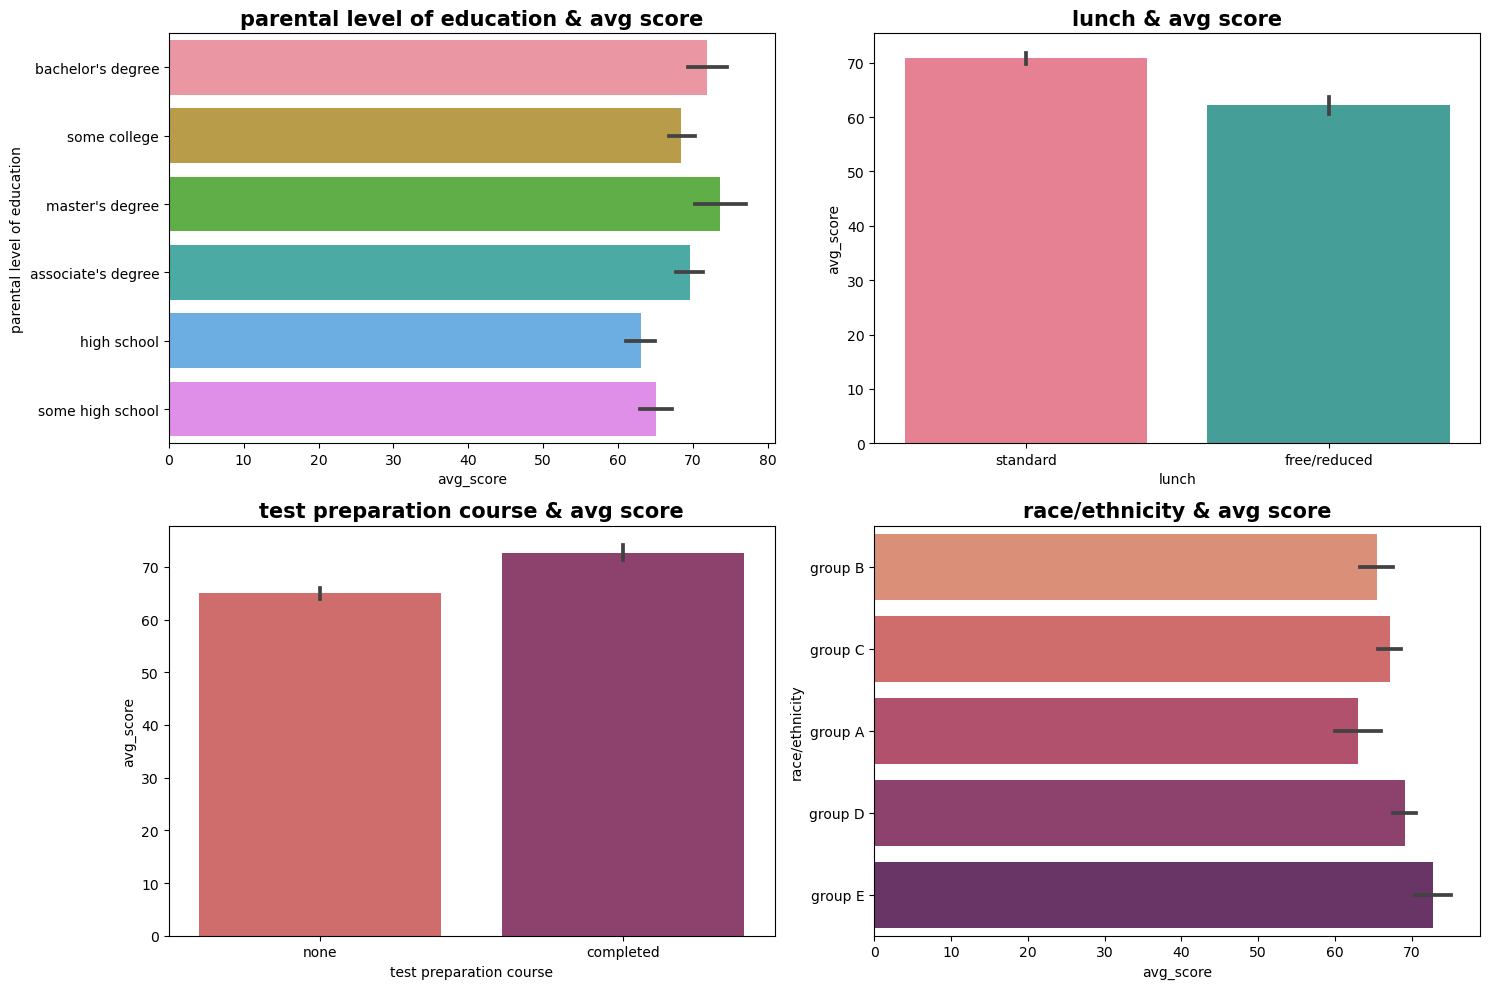

In [39]:
plt.subplots(2, 2, figsize=(15, 10))
sns.color_palette('rocket', as_cmap=True)

plt.subplot(2, 2, 1)
sns.barplot(data=students, x='avg_score', y='parental level of education')
plt.title('parental level of education & avg score', fontsize=15, fontweight='bold')

plt.subplot(2, 2, 2)
sns.barplot(data=students, x='lunch', y='avg_score')
plt.title('lunch & avg score', fontsize=15, fontweight='bold')

plt.subplot(2, 2, 3)
sns.barplot(data=students, x='test preparation course', y='avg_score', palette='flare')
plt.title('test preparation course & avg score', fontsize=15, fontweight='bold')

plt.subplot(2, 2, 4)
sns.barplot(data=students, x='avg_score', y='race/ethnicity', palette='flare')
plt.title('race/ethnicity & avg score', fontsize=15, fontweight='bold')

plt.tight_layout()

<AxesSubplot:xlabel='avg_score', ylabel='parental level of education'>

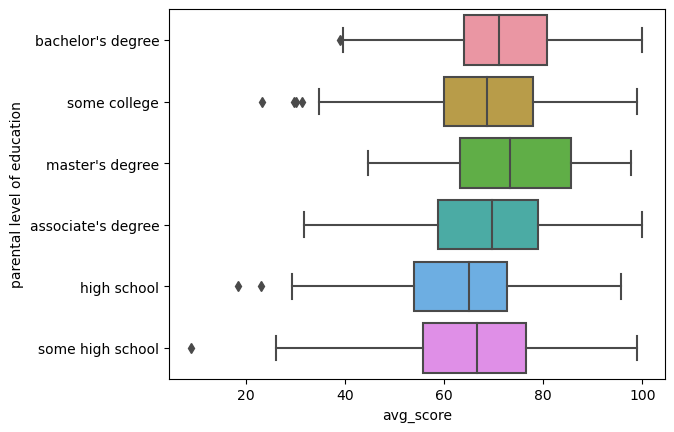

In [40]:
sns.boxplot(data=students, x='avg_score', y='parental level of education')

* **Standard lunch helps perform well in exams**
* **Test preparation course helps perform well in exams**
* **Race/ethnicity has an impact on students performance in exams**
* **Parental level of education has bad effects at lower levels and good effect at higher level**

Text(1.0, 1.2, 'Reading and writing score vs Gender')

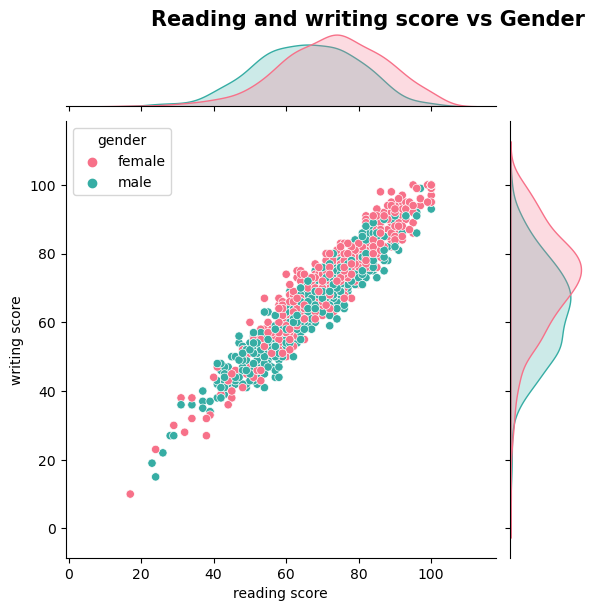

In [41]:
sns.jointplot(x='reading score', y='writing score', hue='gender', data=students)
plt.title('Reading and writing score vs Gender', fontsize=15, fontweight='bold', y=1.2, loc='right')

* **There is positive correlation between reading scores and writing scores**
* **Females scores in reading and writing are better than males**

Text(1.0, 1.2, 'Reading and math score vs Gender')

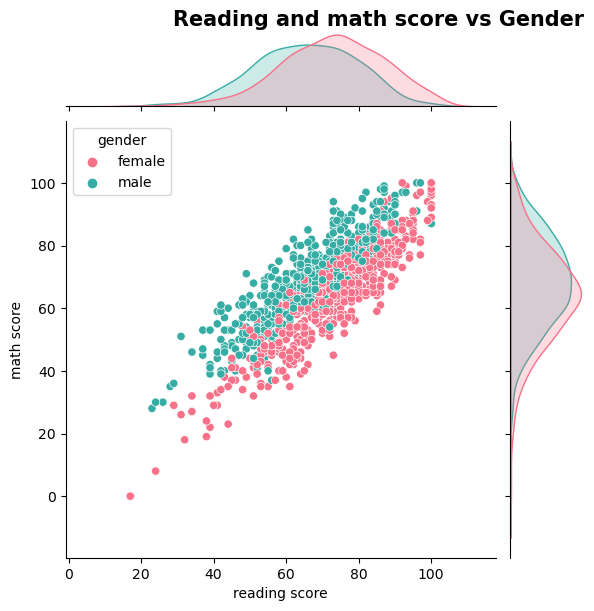

In [42]:
sns.jointplot(data=students, x='reading score', y='math score', hue='gender')
plt.title('Reading and math score vs Gender', fontsize=15, fontweight='bold', y=1.2, loc='right')

* **There is positive correlation between reading scores and maths scores**
* **Males scores in maths are better than females**

Text(1.0, 1.2, 'writing and math score vs Gender')

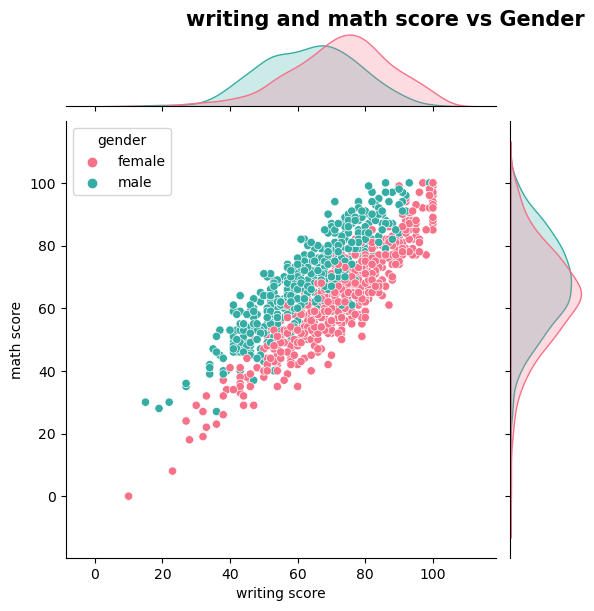

In [43]:
sns.jointplot(data=students, x='writing score', y='math score', hue='gender')
plt.title('writing and math score vs Gender', fontsize=15, fontweight='bold', y=1.2, loc='right')

* **There is positive correlation between reading scores and maths scores**

In [44]:
students.to_csv('updated_data.csv')